In [1]:
import math
import torch
torch.backends.cudnn.benchmark = True
import numpy as np

from network_profile.plotting import plot_time_FLOPs_FLOP_MAC, plt_arithmetic_intensity,plt_time
from network_profile.api import t_profile_net, dataframe_readble

import sys
sys.path.append("../")
from unet.efficient_3dunet import RSUNet

In [2]:
model = RSUNet(12, 4, mode = 'tvm').cuda()
inp = torch.randn(1, 1, 64, 128, 128).cuda()

In [3]:
data = t_profile_net(model, inp)

cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 24, 32, 32, 32]), cin:24, cout:64, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 64, 16, 16, 16]), cin:64, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:t

/home/weihao_zhuang/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2497: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 24, 32, 32, 32]), cin:24, cout:64, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 64, 16, 16, 16]), cin:64, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 192, 4, 4, 4]), cin:192, cout:192, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:t

In [5]:
total_flop = data['fw_operation'].sum() + data['bw_operation'].sum()
print("FLOP:",total_flop)

total_time = data['fwd_node time'].sum() + data['bwd_node time'].sum() 
print("one iteration time:",total_time)

print("average GFLOPs:", total_flop/total_time/1e9)

(data['fwd_node time'][-2] + data['bwd_node time'][-2] ) / total_time

FLOP: 256592846848
one iteration time: 0.16344570211791992
average GFLOPs: 1569.8965682369421


0.1500737065943363

In [6]:
print(data.to_string())

                               layer  fw_operation  bw_operation             input_size            output_size       MAC         fwd_node name fwd_node time       fwd_kernel name fwd_kernel time                 bwd_node name bwd_node time               bwd_kernel name bwd_kernel time fwd_efficient bwd_efficient
Conv_0                      Conv3d_0     157286400     314572800   (1, 1, 64, 128, 128)    (1, 24, 64, 64, 64)   7340632              MyConv3d   0.000359392              MyConv3d     0.000359392              MyConv3dBackward    0.00291941              MyConv3dBackward      0.00291941   4.37646e+11   1.07752e+11
Conv_1                      Conv3d_1    4076863488    8153726976    (1, 24, 64, 64, 64)    (1, 24, 64, 64, 64)  12598464              MyConv3d    0.00146518              MyConv3d      0.00146518              MyConv3dBackward    0.00683417              MyConv3dBackward      0.00683417   2.78249e+12   1.19308e+12
BatchNorm3d_0          BatchNorm3d_0       6291456       6291

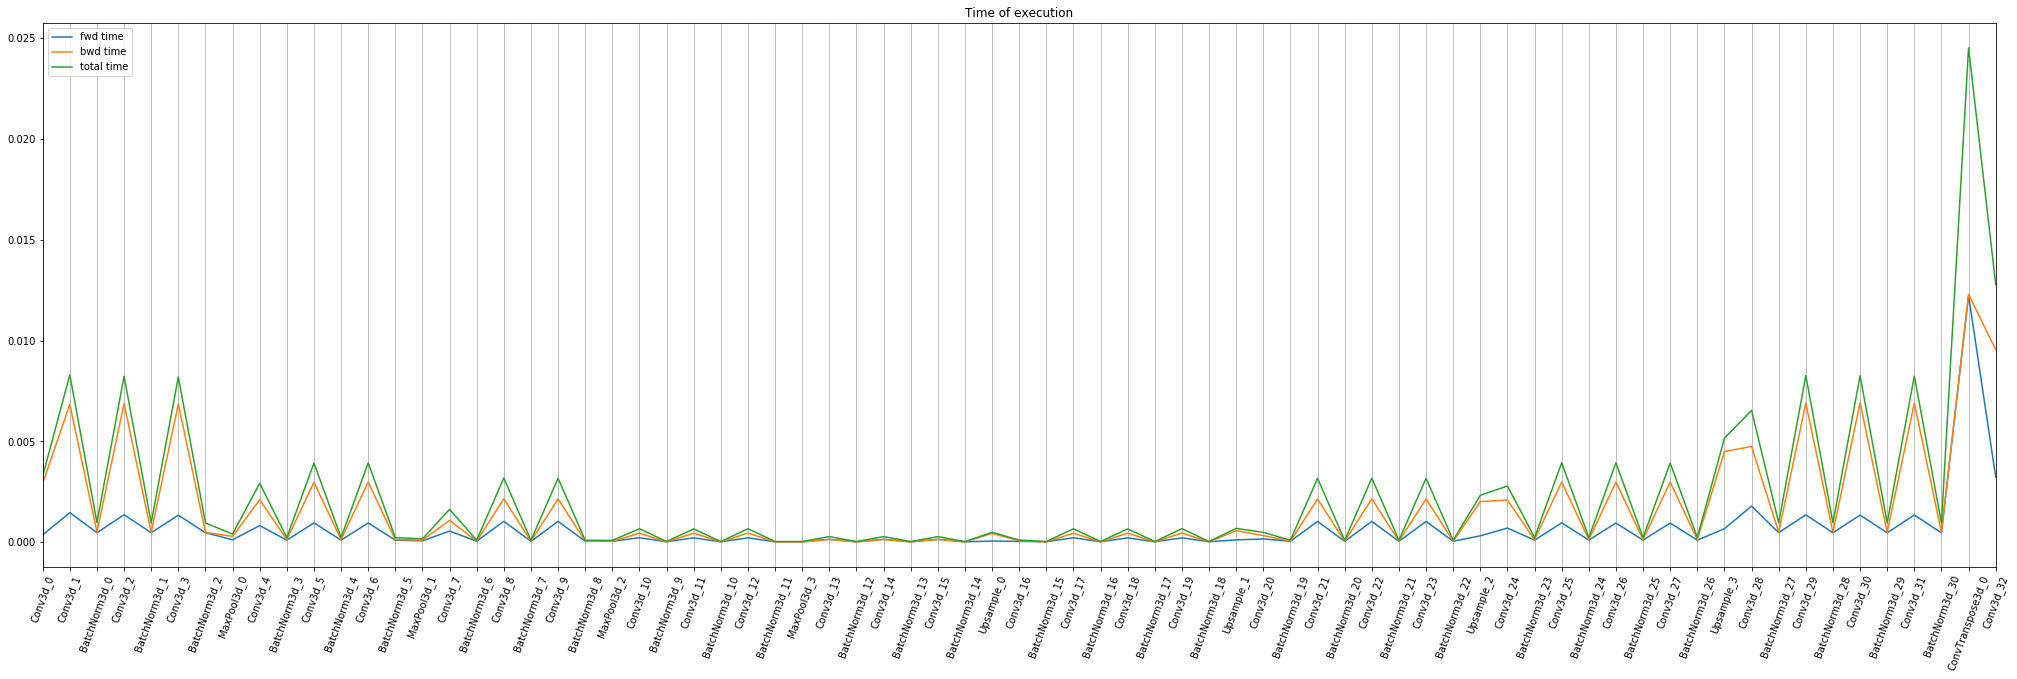

In [7]:
from network_profile.plotting import *
fig, ax = plt.subplots(figsize=(35,10))
plt_time(data,mode='fwd',ax=ax)
plt_time(data,mode='bwd',ax=ax)
plt_time(data,mode='total',ax=ax)

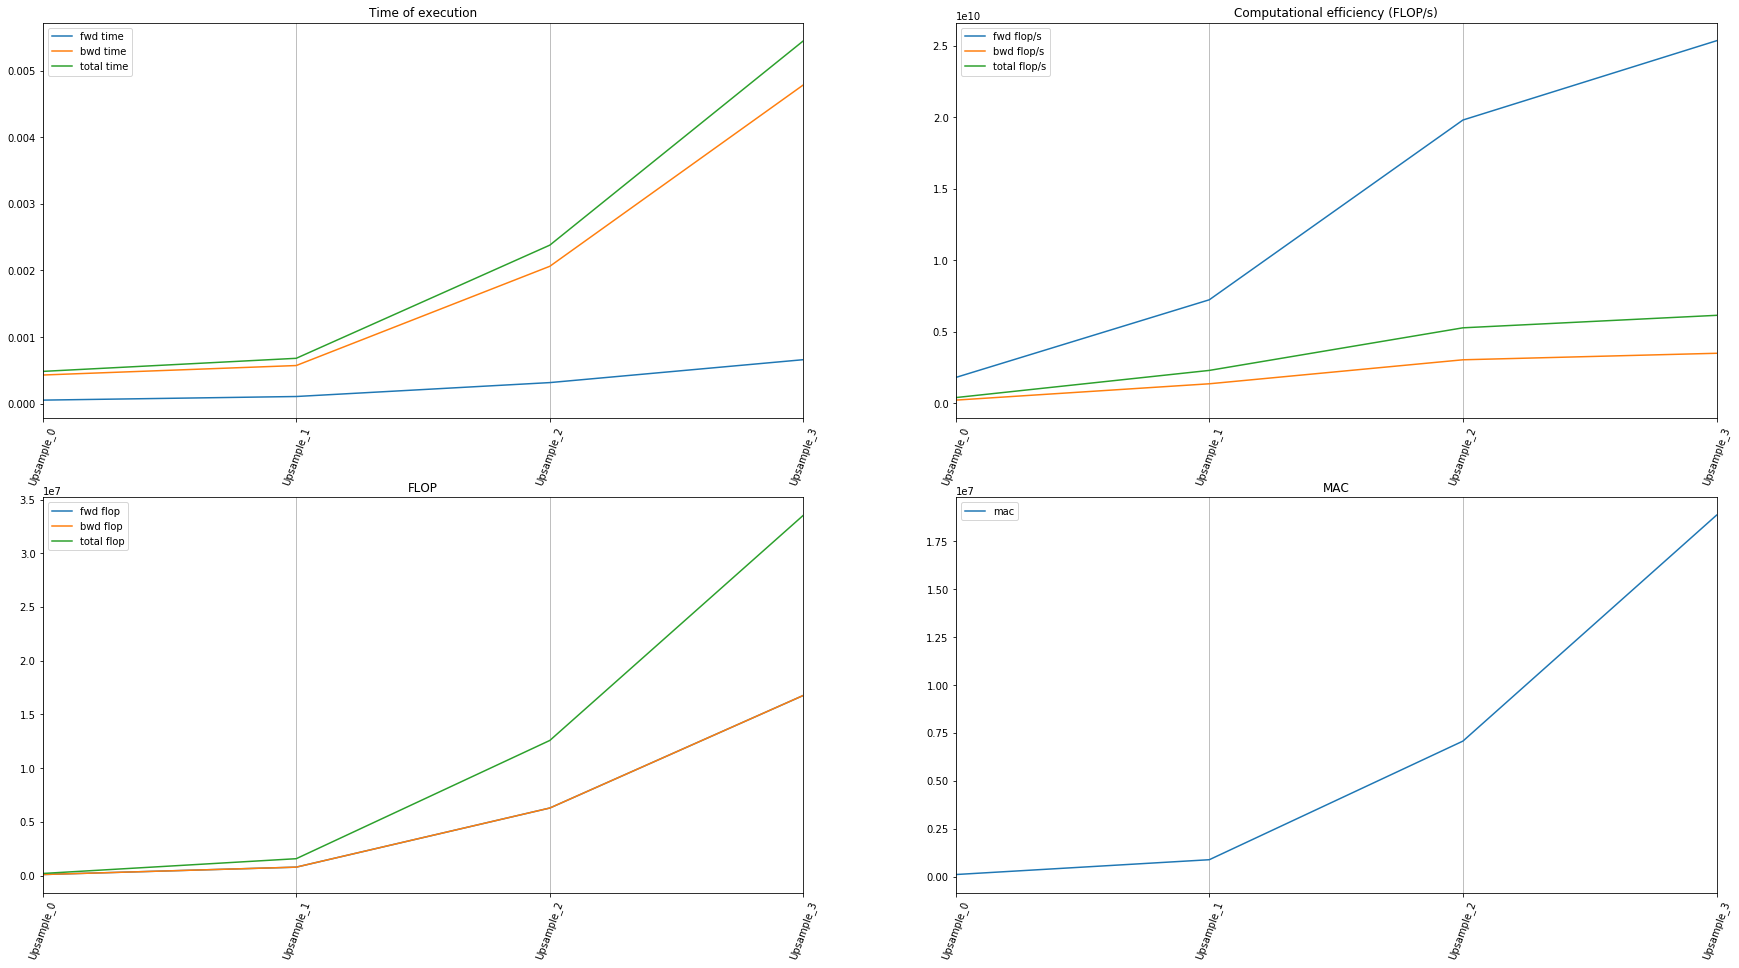

In [9]:
plot_time_FLOPs_FLOP_MAC(data[data["fwd_node name"].isin(["upsample_trilinear3d"])])

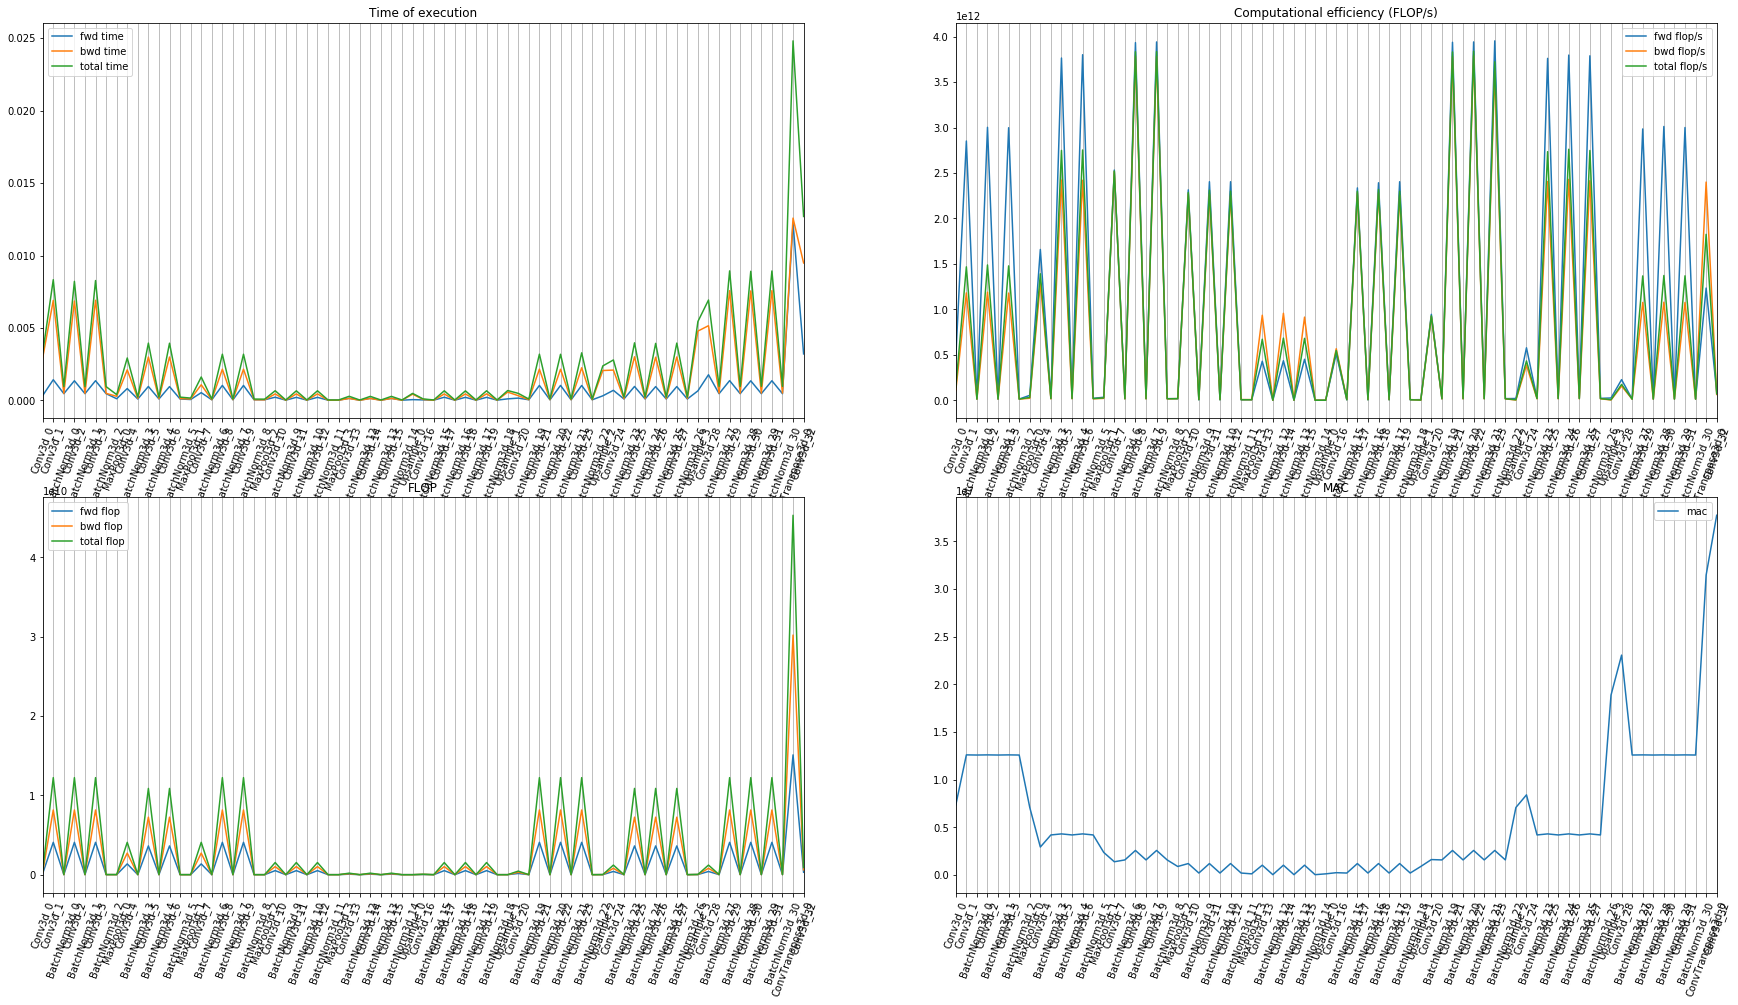

In [10]:

plot_time_FLOPs_FLOP_MAC(data)

In [11]:
##############################################################################

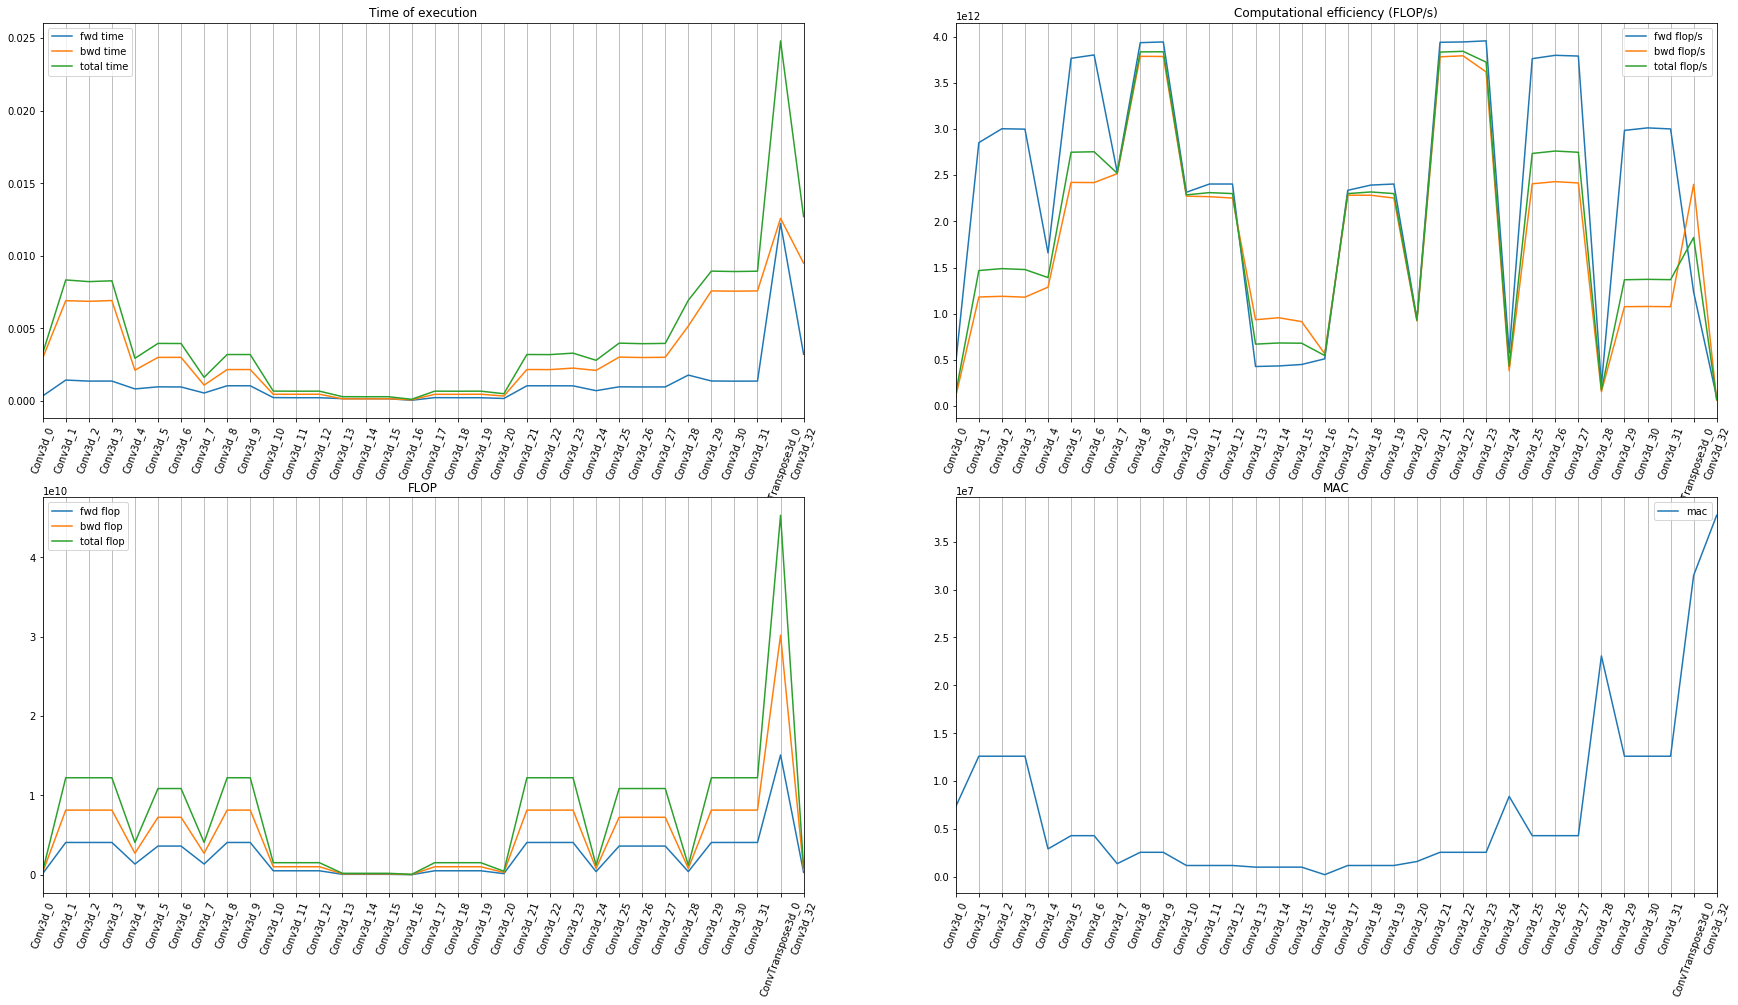

In [12]:
data_conv = data[data["fwd_node name"].isin(["conv3d","MyConv3d","conv_transpose3d"])]
plot_time_FLOPs_FLOP_MAC(data_conv)

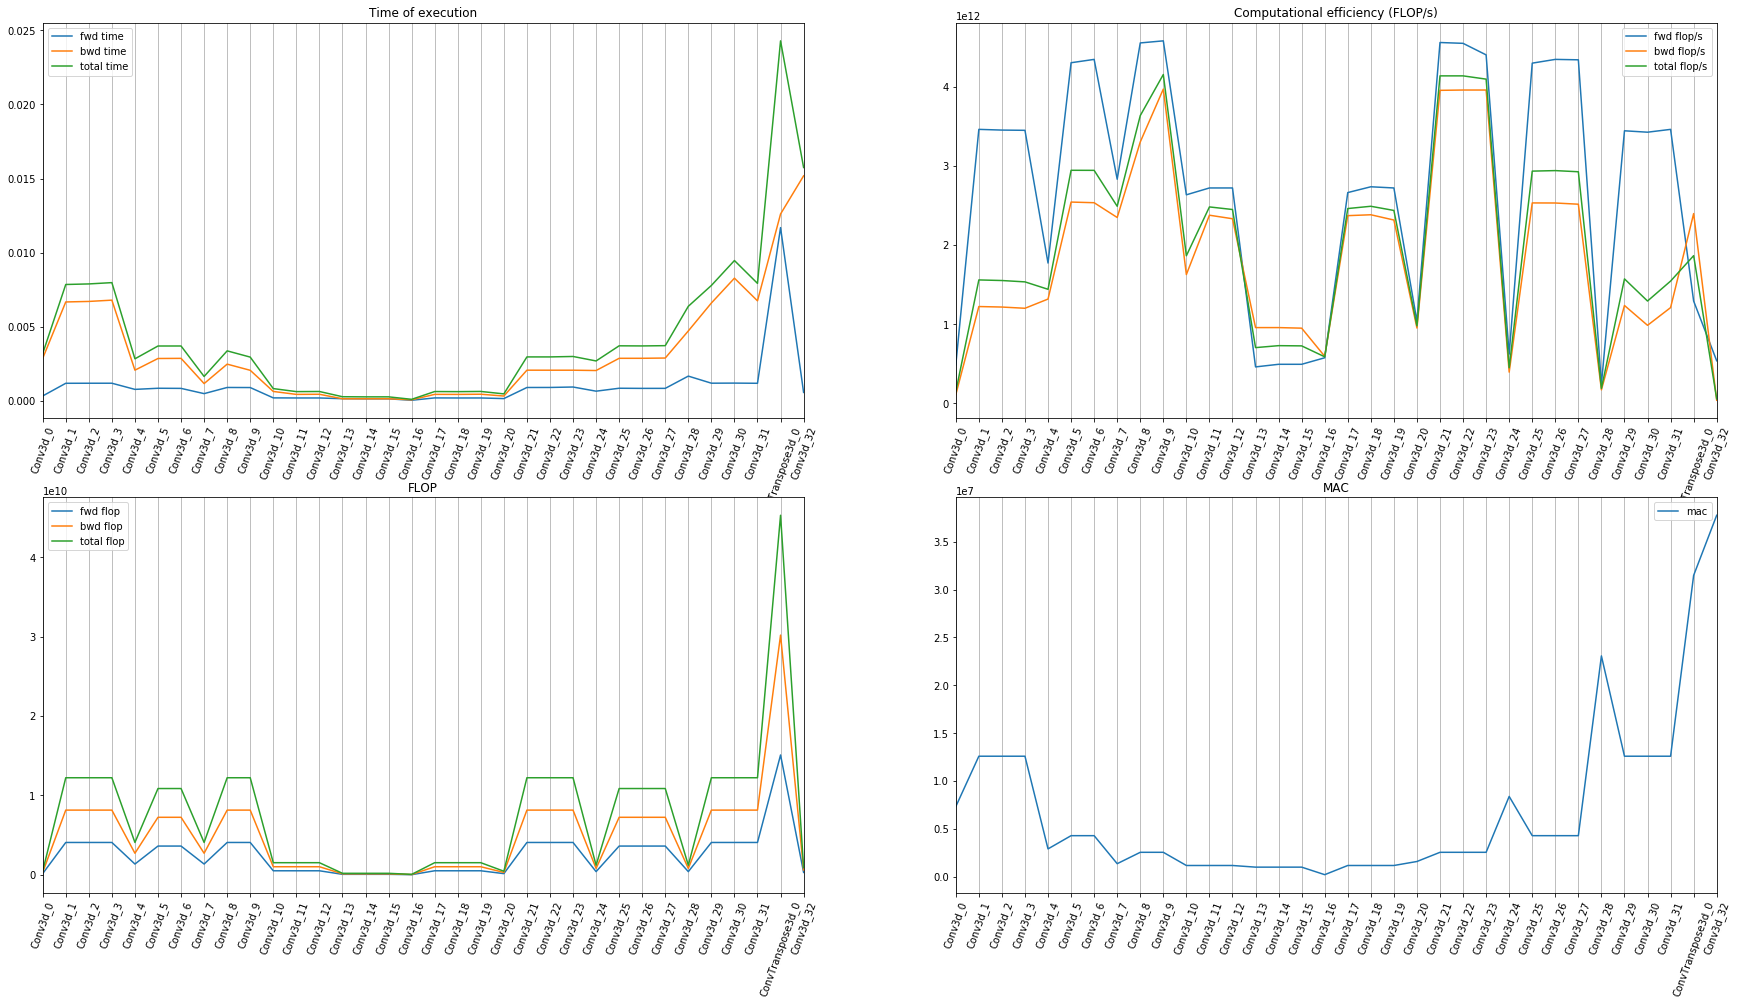

In [11]:
data_conv = data[data["fwd_node name"].isin(["conv3d","MyConv3d","conv_transpose3d"])]
plot_time_FLOPs_FLOP_MAC(data_conv)

#### PYTORCH

In [15]:
total_flop = data['fw_operation'].sum() + data['bw_operation'].sum()
print("FLOP:",total_flop)

total_time = data['fwd_node time'].sum() + data['bwd_node time'].sum() 
print("one iteration time:",total_time)

print("average GFLOPs:", total_flop/total_time/1e9)

(data['fwd_node time'][-2] + data['bwd_node time'][-2] ) / total_time

FLOP: 256592846848
one iteration time: 0.24736623315429687
average GFLOPs: 1037.2994065360083


0.09287628605687456

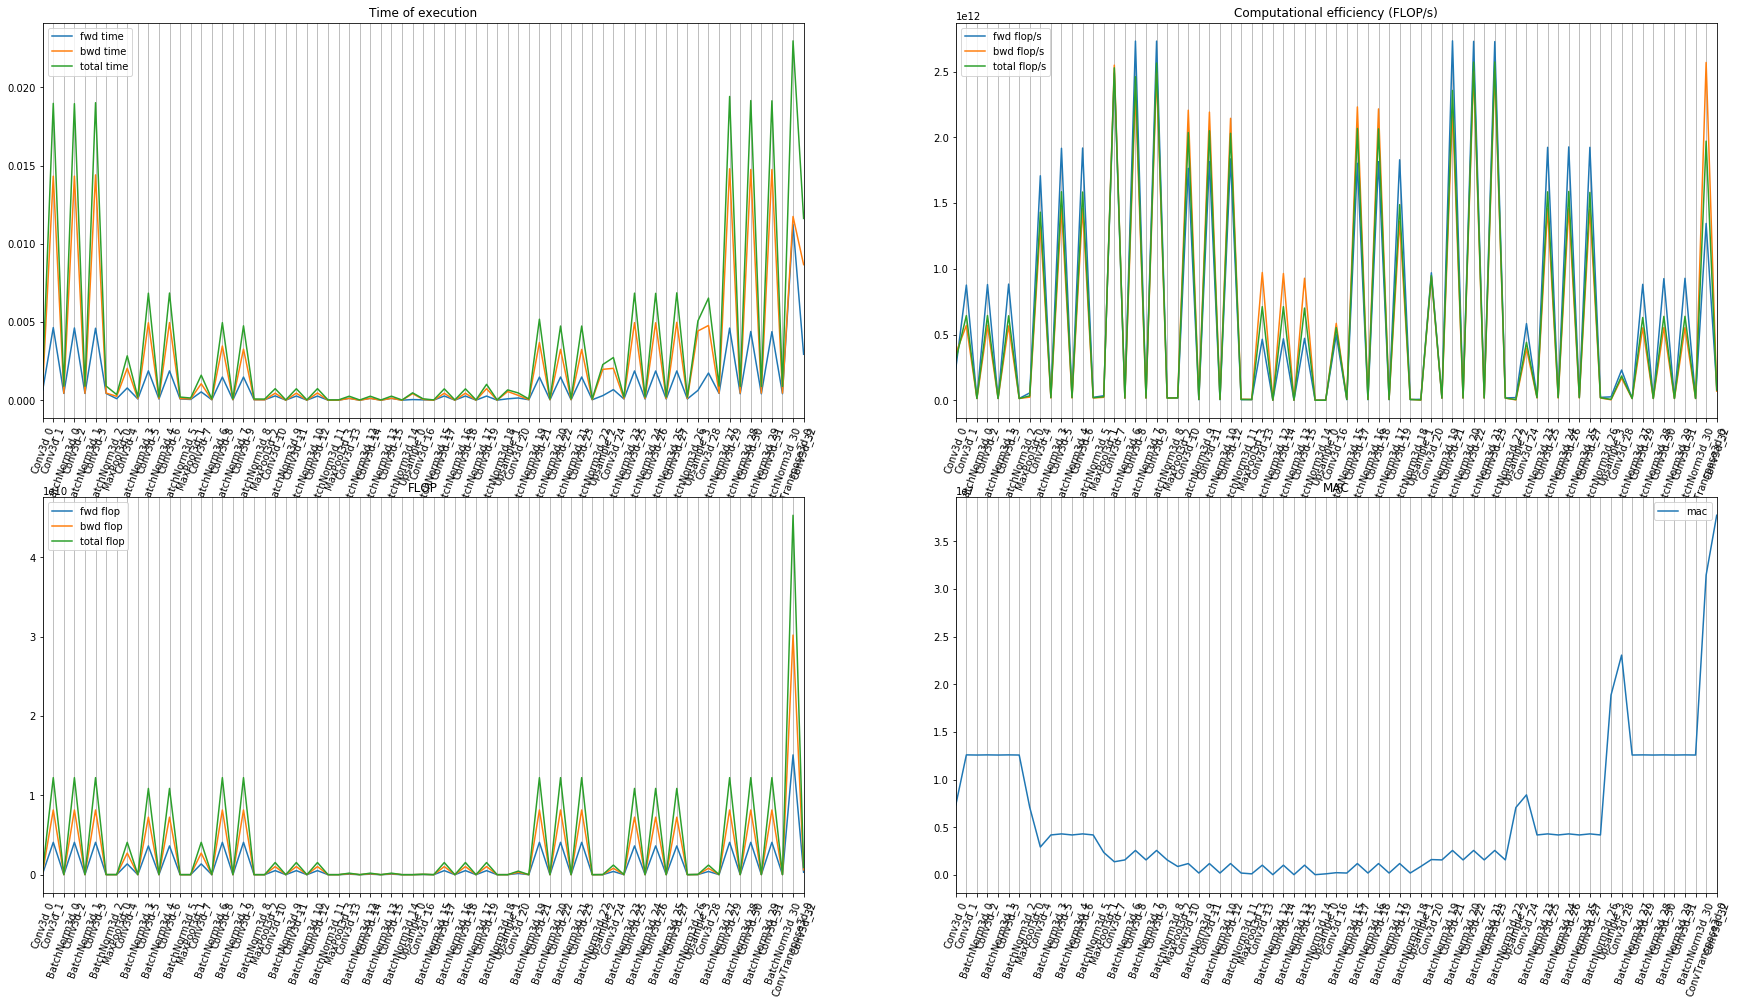

In [16]:
plot_time_FLOPs_FLOP_MAC(data)

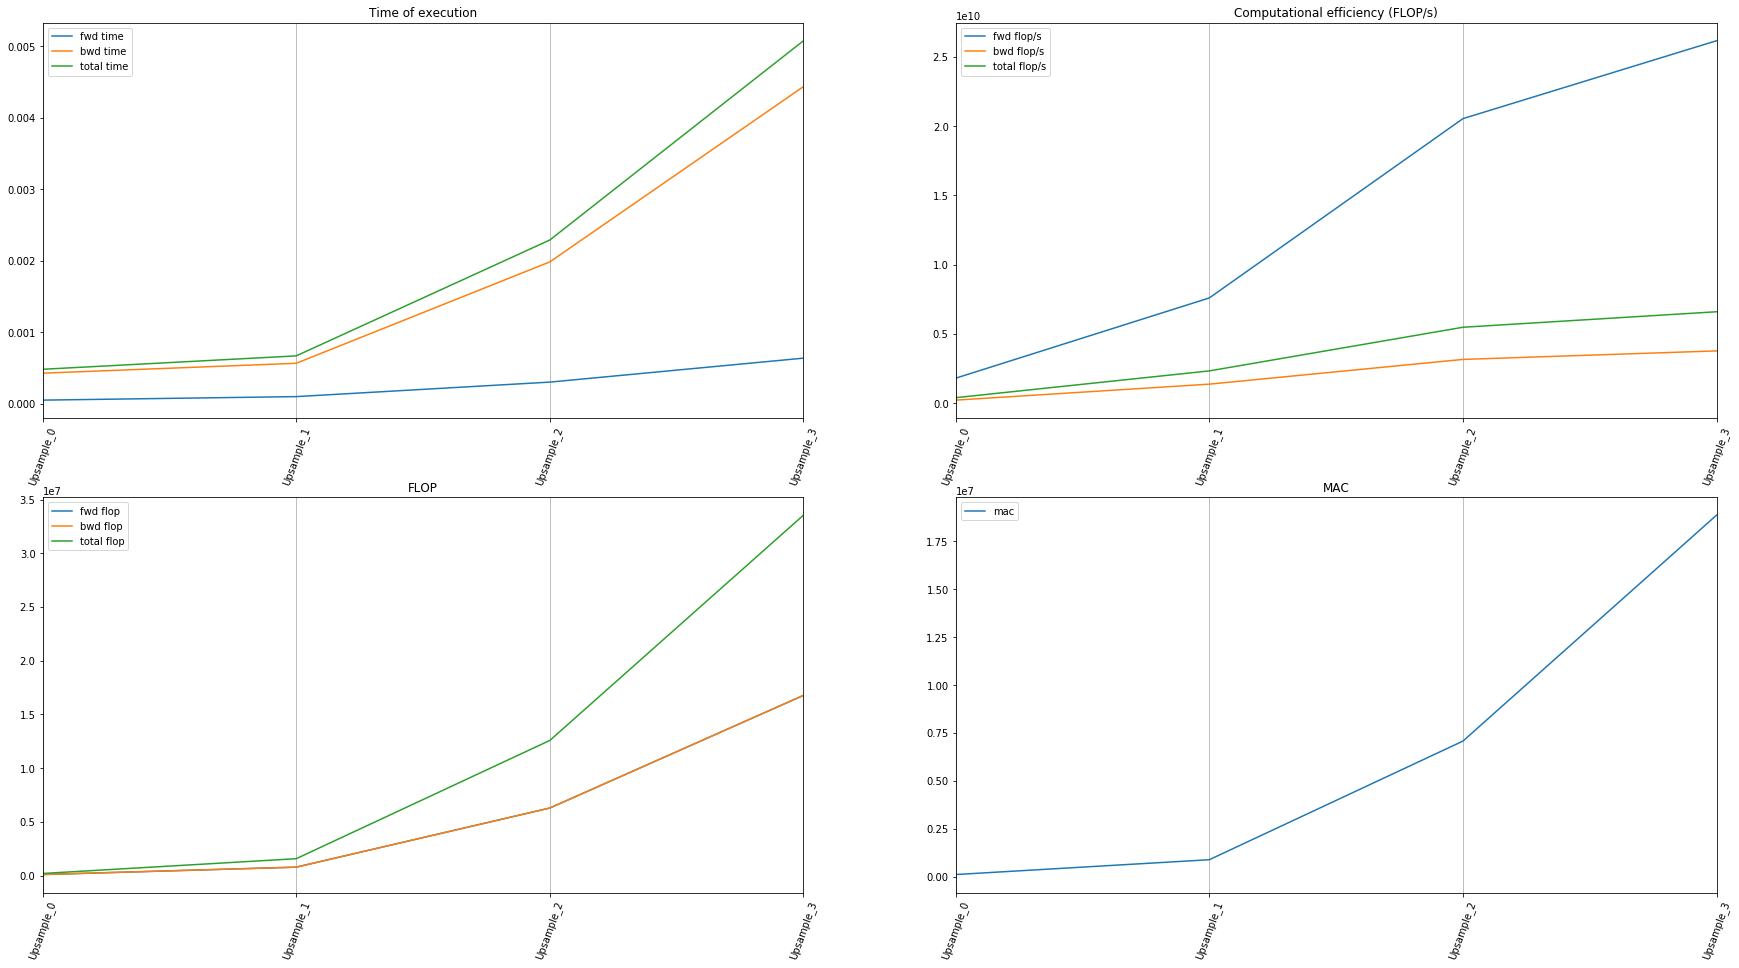

In [17]:
plot_time_FLOPs_FLOP_MAC(data[data["fwd_node name"].isin(["upsample_trilinear3d"])])

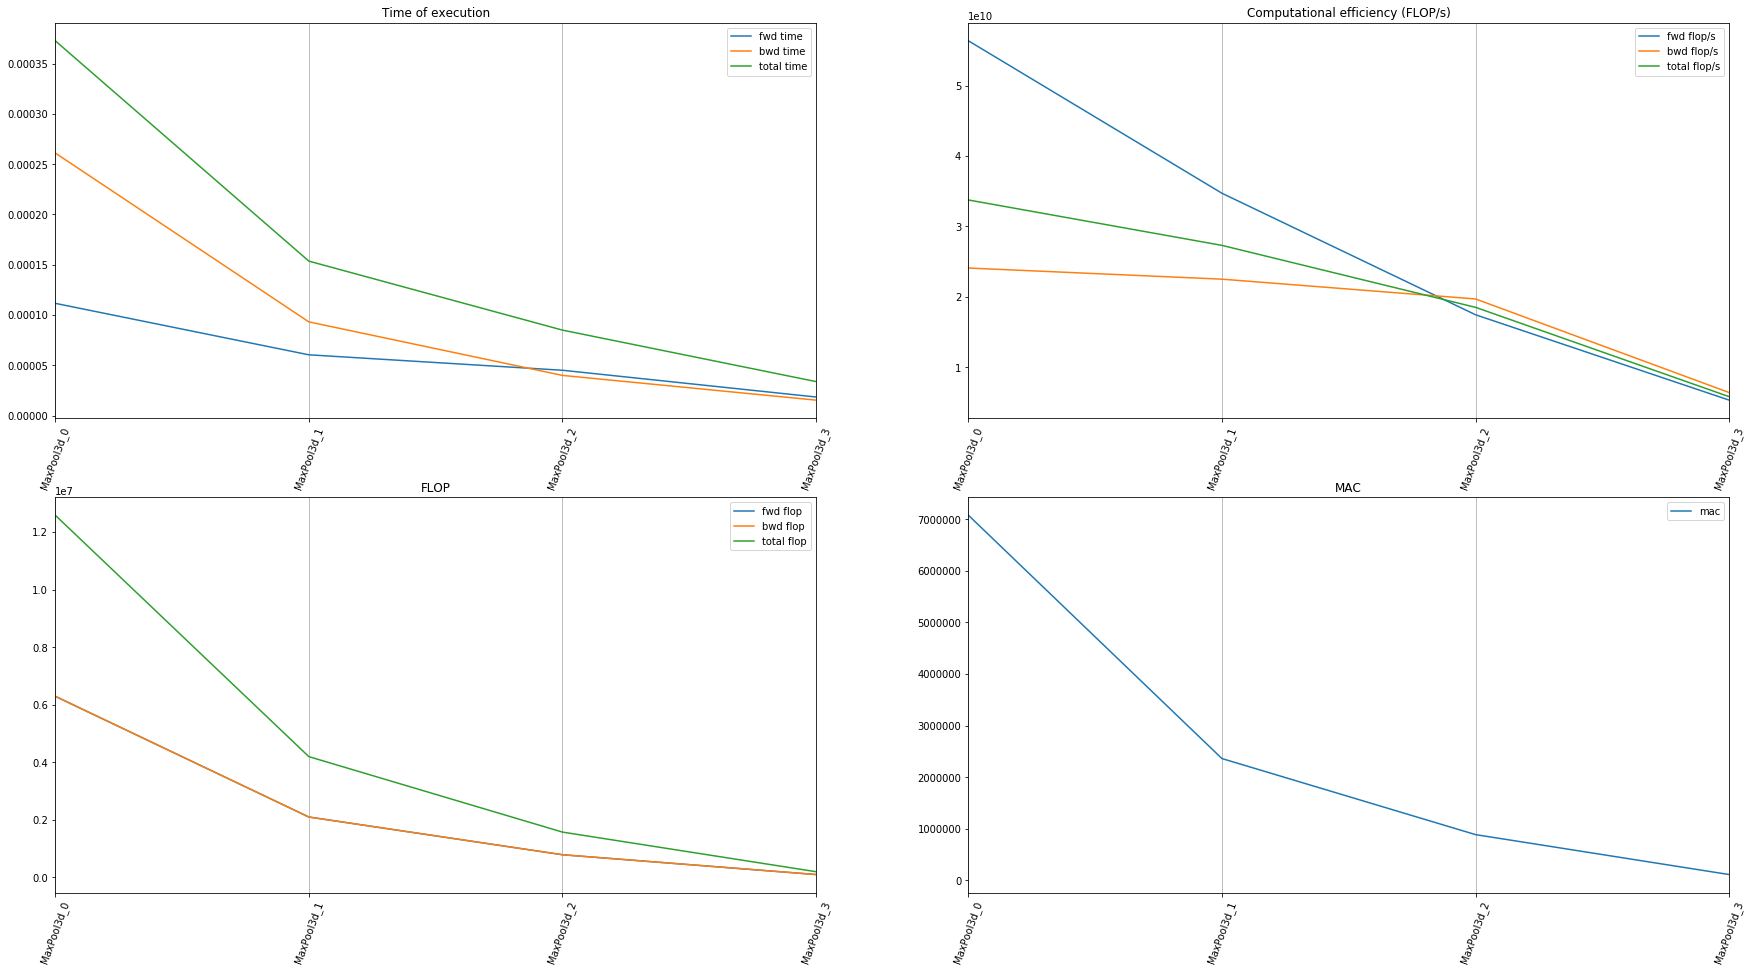

In [18]:
plot_time_FLOPs_FLOP_MAC(data[data["fwd_node name"].isin(["max_pool3d"])])

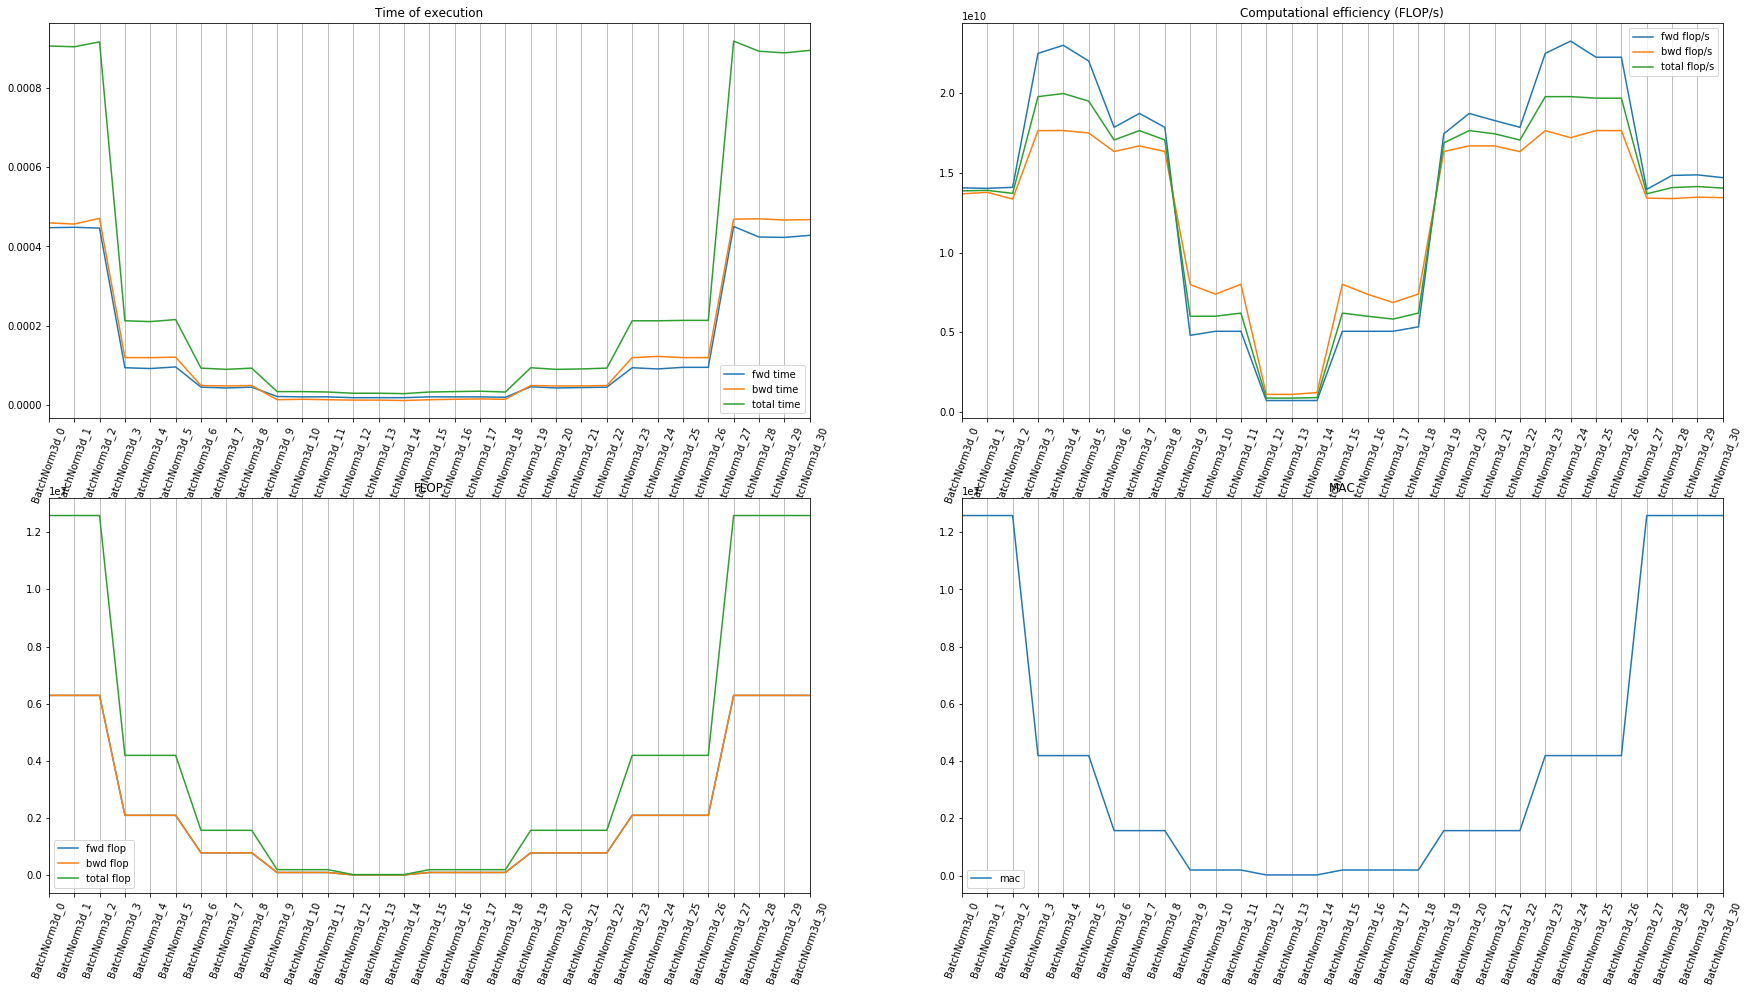

In [19]:
plot_time_FLOPs_FLOP_MAC(data[data["fwd_node name"].isin(["batch_norm"])])

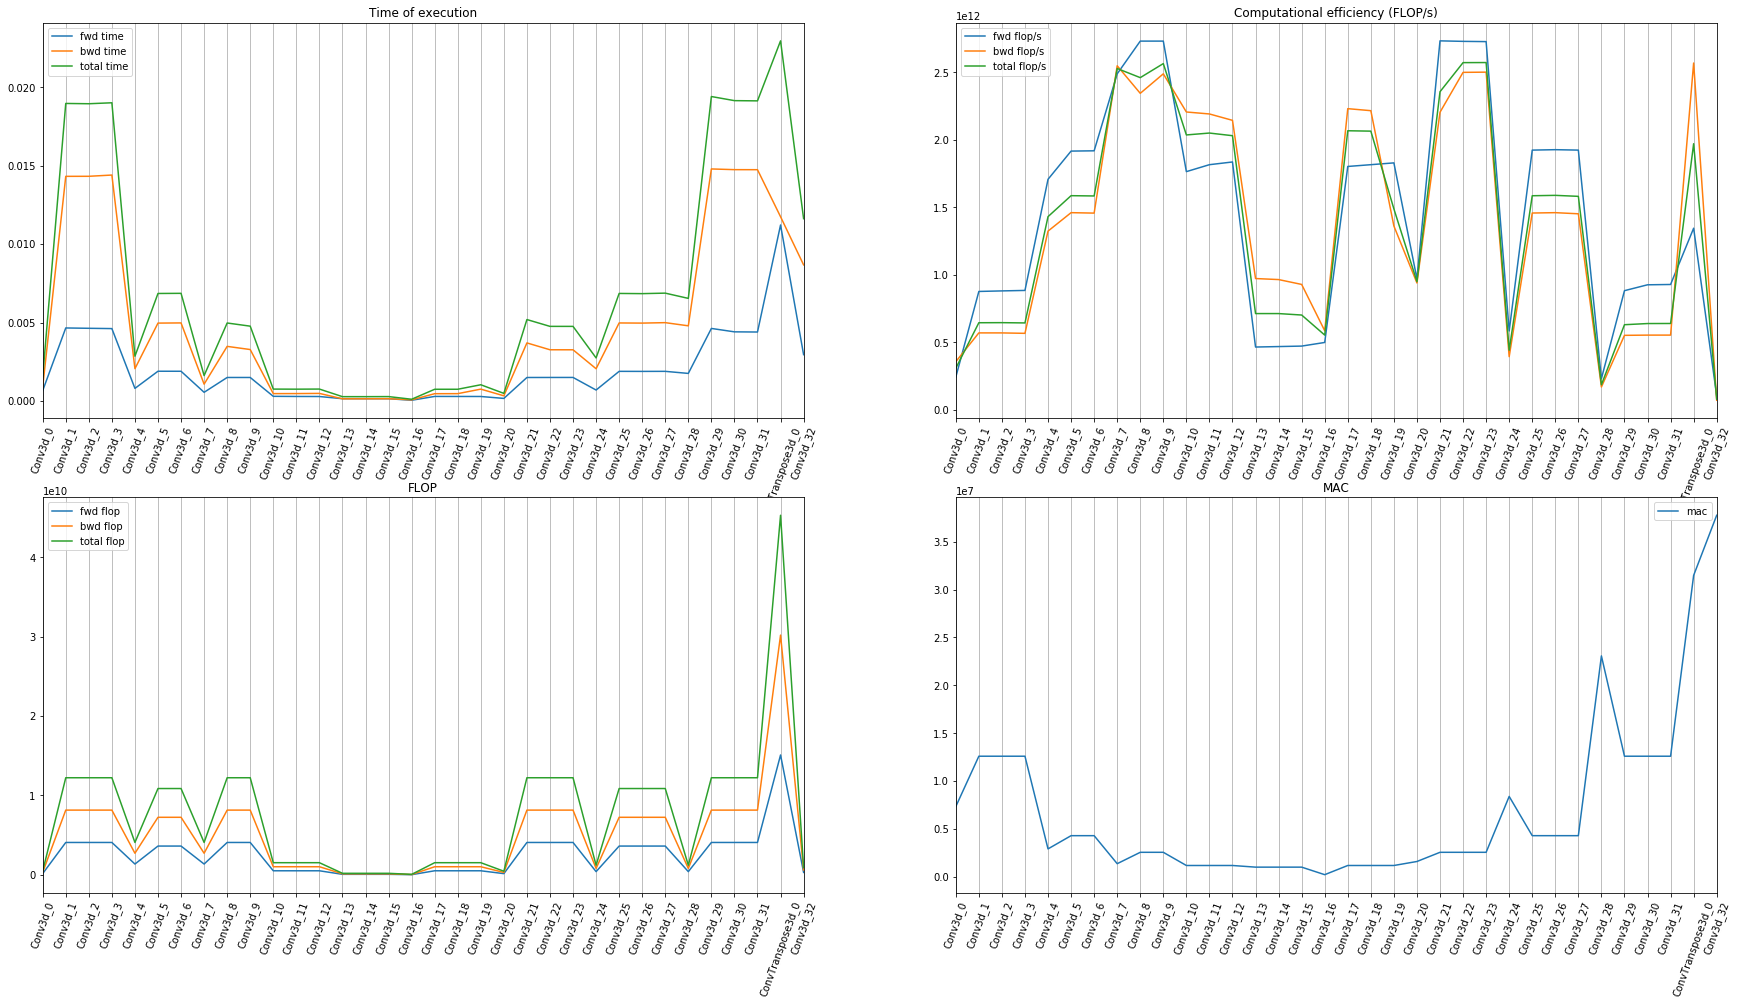

In [20]:
data_conv = data[data["fwd_node name"].isin(["conv3d","MyConv3d","conv_transpose3d"])]
plot_time_FLOPs_FLOP_MAC(data_conv)